In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df['Sex'] = (df['Sex'] == 'female')*1

**Faltantes**: Age, Cabin, Embarked
**Objetos**:Name, Sex, Ticket, Cabin,Embarked
**Variável Alvo**: Survived

In [5]:
df.set_index('PassengerId', inplace=True)

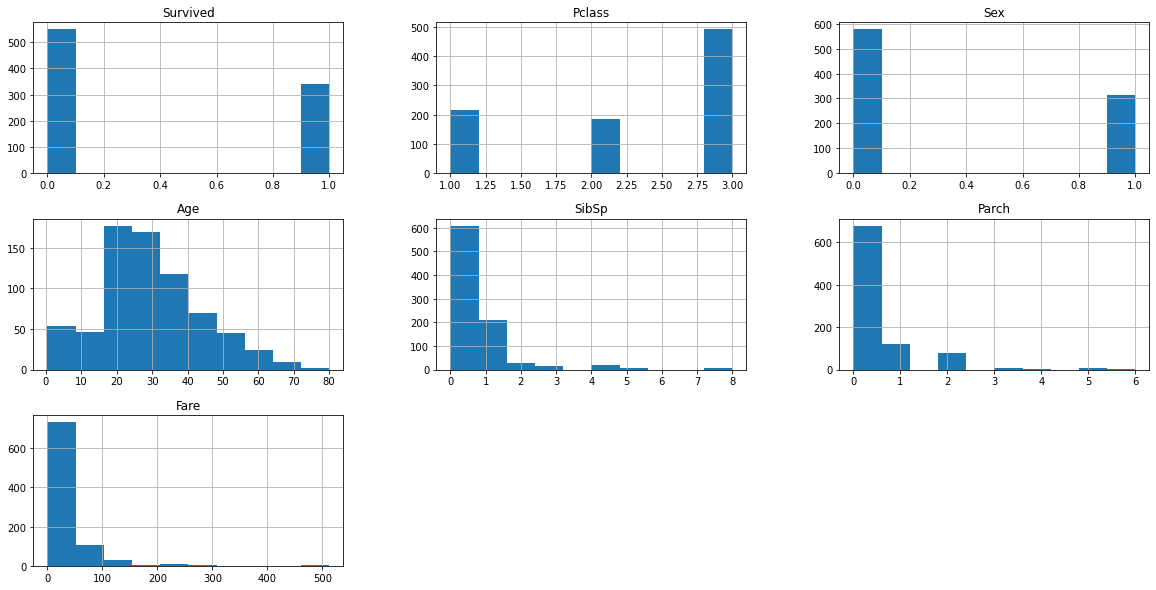

In [6]:
df.hist(figsize=(20,10))
plt.show()

In [11]:
dfn = df.drop(['Ticket', 'Cabin', 'Name'], axis=1)

In [34]:
dfn['Novo1'] = df['SibSp']/df['Age']
dfn['Novo2'] = (df['Parch']+1)/df['Age']

In [35]:
dfn.corrwith(dfn['Survived'], method='kendall')

Survived    1.000000
Pclass     -0.323533
Sex         0.543351
Age        -0.043385
SibSp       0.085915
Parch       0.133933
Fare        0.266229
Novo1       0.079253
Novo2       0.085349
dtype: float64

In [10]:
df_t = dfn.copy()
for i in range(2, 7):
    print(str(i).center(50,'-'))
    df_t['Age_cat'] = pd.cut(dfn['Age'], bins=i,labels=False)
    print("Cut:",df_t.corrwith(df_t['Survived'], method='pearson')['Age_cat'])
    df_t['Age_cat'] = pd.qcut(dfn['Age'], q=i,labels=False)
    print("QCut:",df_t.corrwith(df_t['Survived'],method='pearson')['Age_cat'])

------------------------2-------------------------
Cut: -0.041473745526412115
QCut: -0.005528388440315164
------------------------3-------------------------
Cut: -0.022088641242549143
QCut: -0.0171431593458819
------------------------4-------------------------
Cut: -0.07345658751409877
QCut: -0.041259502564503565
------------------------5-------------------------
Cut: -0.06770922716441012
QCut: -0.03728967598102961
------------------------6-------------------------
Cut: -0.06831230127489037
QCut: -0.03800474433370351


**pd.cut - 4 categorias**

In [11]:
df_t = dfn.copy()
for i in range(2, 9):
    print(str(i).center(50,'-'))
    df_t['Fare_cat'] = pd.cut(dfn['Fare'], bins=i,labels=False)
    print("Cut:",df_t.corrwith(df_t['Survived'], method='kendall')['Fare_cat'])
    df_t['Fare_cat'] = pd.qcut(dfn['Fare'], q=i,labels=False)
    print("QCut:",df_t.corrwith(df_t['Survived'],method='kendall')['Fare_cat'])

------------------------2-------------------------
Cut: 0.08182666543712792
QCut: 0.27498107521116893
------------------------3-------------------------
Cut: 0.09868338681513454
QCut: 0.28845487450276475
------------------------4-------------------------
Cut: 0.1528058903381667
QCut: 0.27326329003493277
------------------------5-------------------------
Cut: 0.18037599309196975
QCut: 0.28401145414613244
------------------------6-------------------------
Cut: 0.22330921401200138
QCut: 0.2868423427044833
------------------------7-------------------------
Cut: 0.24842160670550348
QCut: 0.2707529099601039
------------------------8-------------------------
Cut: 0.2401885650451285
QCut: 0.2736412242607812


**Fare - qcut 5 categorias**

* **Pclass**
* **Sex**
* **Age_cat**
* **SibSp**
* **Parch**
* **Fare_cat**
* **Embarked**

# Substituindo dados faltantes

In [18]:
from sklearn.impute import SimpleImputer